In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [13]:
df = pd.read_csv('C:/Users/User/Desktop/CC GENERAL.csv')

In [6]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


<Figure size 1200x1000 with 0 Axes>

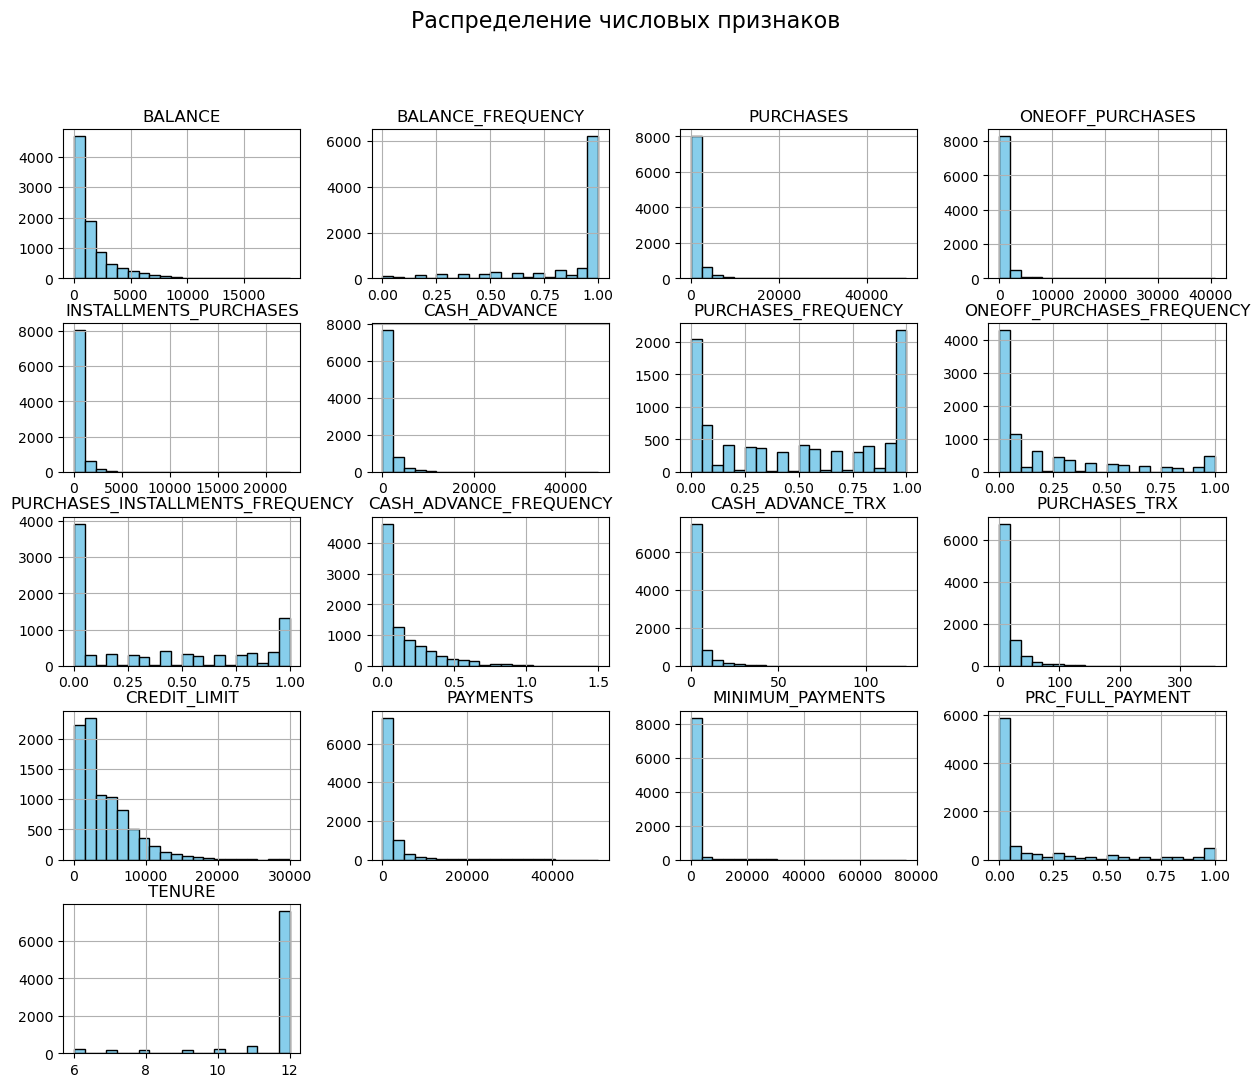

In [4]:
plt.figure(figsize=(12, 10))
df.hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Распределение числовых признаков", fontsize=16)
plt.show()

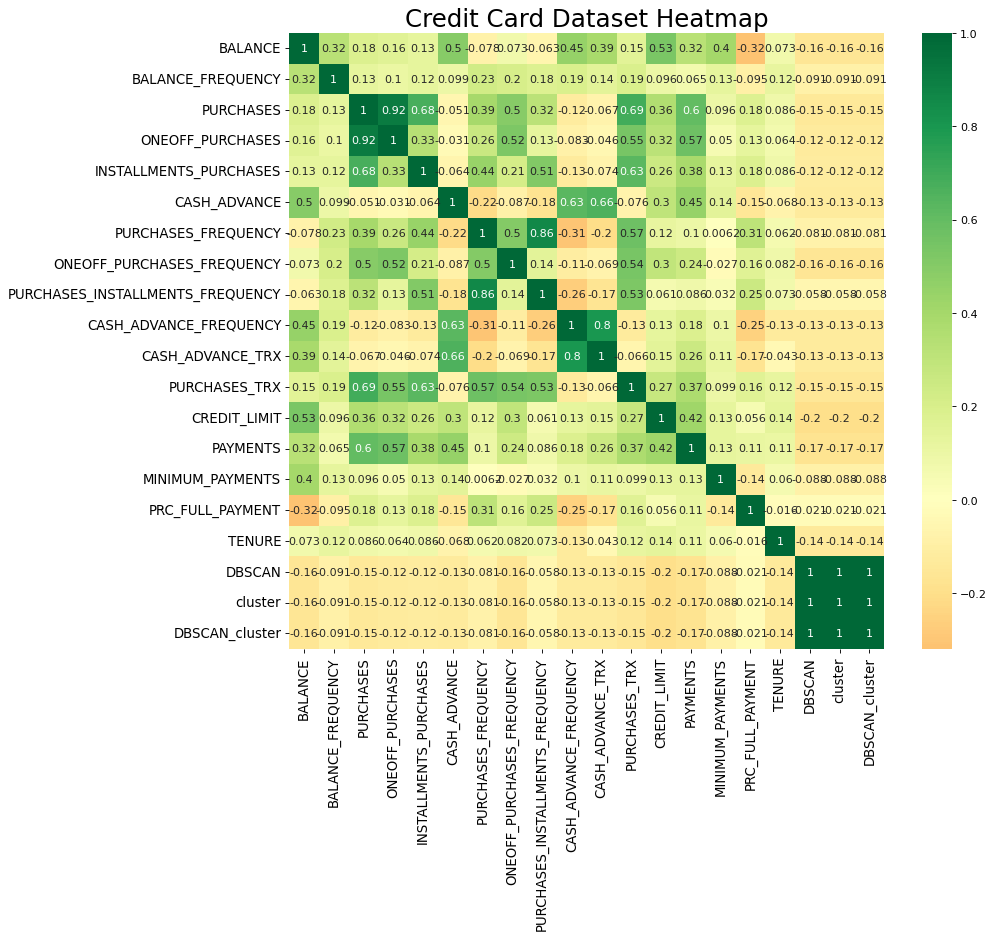

In [22]:
heatdf = df
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(heatdf.corr(), xticklabels=heatdf.corr().columns, yticklabels=heatdf.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Credit Card Dataset Heatmap', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

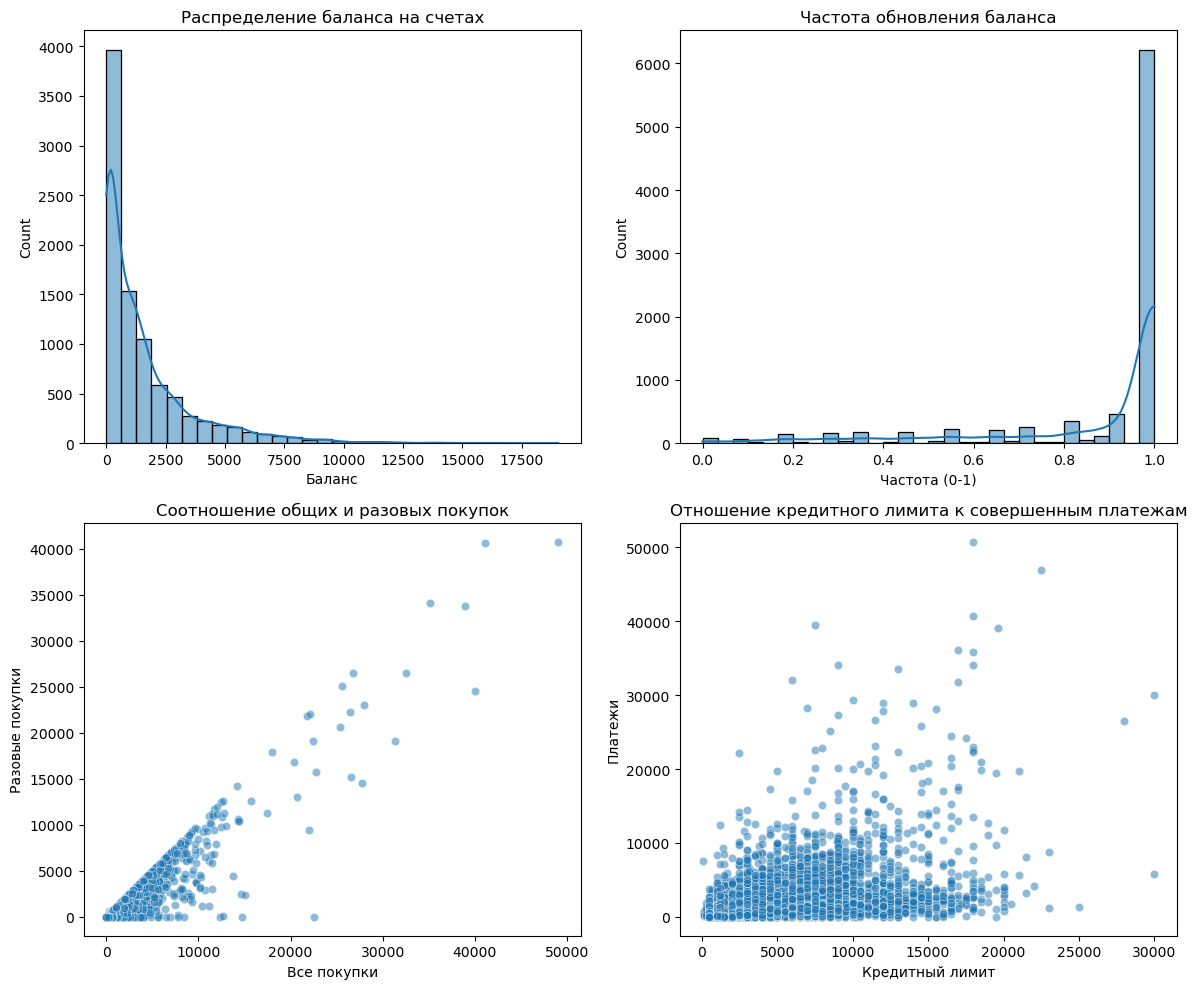

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data=df, x="BALANCE", kde=True, ax=axes[0,0], bins=30)
axes[0,0].set_title("Распределение баланса на счетах")
axes[0,0].set_xlabel("Баланс")

sns.histplot(data=df, x="BALANCE_FREQUENCY", kde=True, ax=axes[0,1], bins=30)
axes[0,1].set_title("Частота обновления баланса")
axes[0,1].set_xlabel("Частота (0-1)")

sns.scatterplot(data=df, x="PURCHASES", y="ONEOFF_PURCHASES", 
                alpha=0.5, ax=axes[1,0])
axes[1,0].set_title("Соотношение общих и разовых покупок")
axes[1,0].set_xlabel("Все покупки")
axes[1,0].set_ylabel("Разовые покупки")

sns.scatterplot(data=df, x="CREDIT_LIMIT", y="PAYMENTS", 
                alpha=0.5, ax=axes[1,1])
axes[1,1].set_title("Отношение кредитного лимита к совершенным платежам")
axes[1,1].set_xlabel("Кредитный лимит")
axes[1,1].set_ylabel("Платежи")

plt.tight_layout()
plt.show()

In [8]:
print("Основная информация о данных:")
print(df.info())

Основная информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 

In [9]:
print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isna().sum())


Количество пропущенных значений в каждом столбце:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [4]:
median_minpay = df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(median_minpay)
median_credlim = df['CREDIT_LIMIT'].median()
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(median_credlim)

In [5]:
df = df.drop(columns=['CUST_ID'])

In [6]:
print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isna().sum())


Количество пропущенных значений в каждом столбце:
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [14]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

np.random.seed(42)
kmeans = KMeans(n_clusters = 12, random_state = 42, n_init = 'auto')
kmeans_labels = kmeans.fit(X_scaled)
# print(f"MSE: {kmeans.inertia_}")

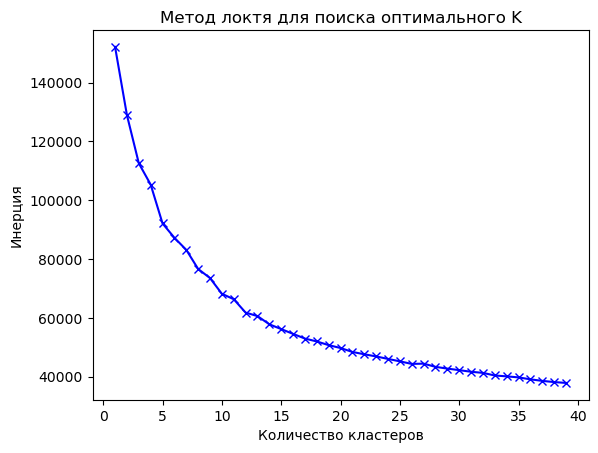

In [11]:
np.random.seed(42)
distortions = []
K = range(1, 40)
for k in K:
    model = KMeans(n_clusters = k, random_state = 42, n_init = 'auto').fit(X_scaled)
    distortions.append(model.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.title('Метод локтя для поиска оптимального K')
plt.show()

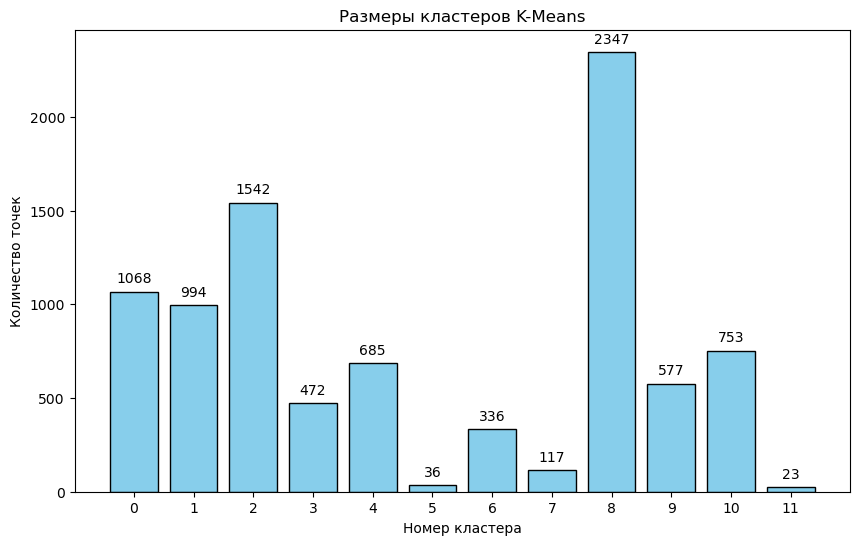

In [12]:
# K-Means кластеризация
kmeans = KMeans(n_clusters=12, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Визуализация размеров кластеров
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()

plt.figure(figsize=(10, 6))

# Преобразуем индексы в числовой тип
x_positions = np.arange(len(cluster_counts))  # или cluster_counts.index.astype(int)
colors = ['skyblue' for _ in cluster_counts.index]

plt.bar(x_positions, cluster_counts.values, color=colors, edgecolor='black')

plt.title('Размеры кластеров K-Means')
plt.xlabel('Номер кластера')
plt.ylabel('Количество точек')
plt.xticks(x_positions, cluster_counts.index)  # Подписываем оси правильными номерами

for i, v in enumerate(cluster_counts.values):
    plt.text(x_positions[i], v + max(cluster_counts.values)*0.02, str(v), ha='center')

plt.show()

In [9]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
df['DBSCAN'] = dbscan.fit_predict(X_scaled)

labels = dbscan.labels_

df['cluster'] = dbscan.labels_
n_ = list(df['DBSCAN']).count(-1)

print(n_)
print(df.tail())

# print(f"Найдено кластеров: {len(np.unique(sk_dbscan_res)) - (1 if -1 in sk_dbscan_res else 0)}")
# print(f"Шумовых точек: {np.sum(sk_dbscan_res == -1)}")

4406
         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945   28.493517           1.000000     291.12              0.00   
8946   19.183215           1.000000     300.00              0.00   
8947   23.398673           0.833333     144.40              0.00   
8948   13.457564           0.833333       0.00              0.00   
8949  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000           

In [10]:
# 1. Инициализация и обучение
dbscan = DBSCAN(eps=0.8, min_samples=5)
# Лучше создать одну колонку для меток
df['DBSCAN_cluster'] = dbscan.fit_predict(X_scaled)

# 2. Анализ шума
n_noise = np.sum(df['DBSCAN_cluster'] == -1)

# 3. Подсчет количества кластеров (исключая шум)
labels = df['DBSCAN_cluster']
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Шумовых точек (аномалий): {n_noise}")
print(f"Количество найденных кластеров: {n_clusters}")
print(df.tail())

Шумовых точек (аномалий): 4406
Количество найденных кластеров: 18
         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945   28.493517           1.000000     291.12              0.00   
8946   19.183215           1.000000     300.00              0.00   
8947   23.398673           0.833333     144.40              0.00   
8948   13.457564           0.833333       0.00              0.00   
8949  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                    

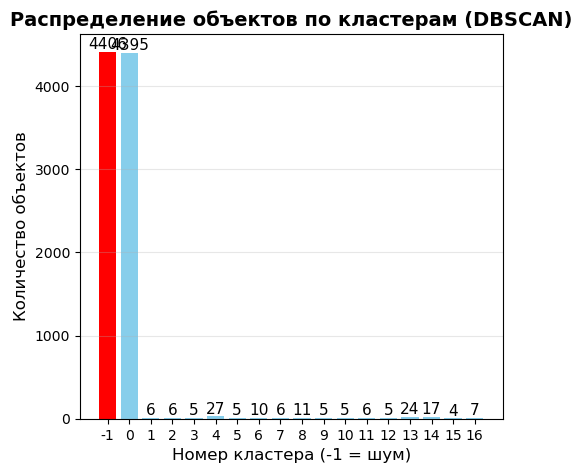

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
dbscan_counts = df['DBSCAN'].value_counts().sort_index()
bars = plt.bar(range(len(dbscan_counts)), dbscan_counts.values, 
               color=['red' if i == -1 else 'skyblue' for i in dbscan_counts.index])
plt.title('Распределение объектов по кластерам (DBSCAN)', fontsize=14, fontweight='bold')
plt.xlabel('Номер кластера (-1 = шум)', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.xticks(range(len(dbscan_counts)), dbscan_counts.index)
for bar, count in zip(bars, dbscan_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(count), ha='center', va='bottom', fontsize=11)
plt.grid(axis='y', alpha=0.3)

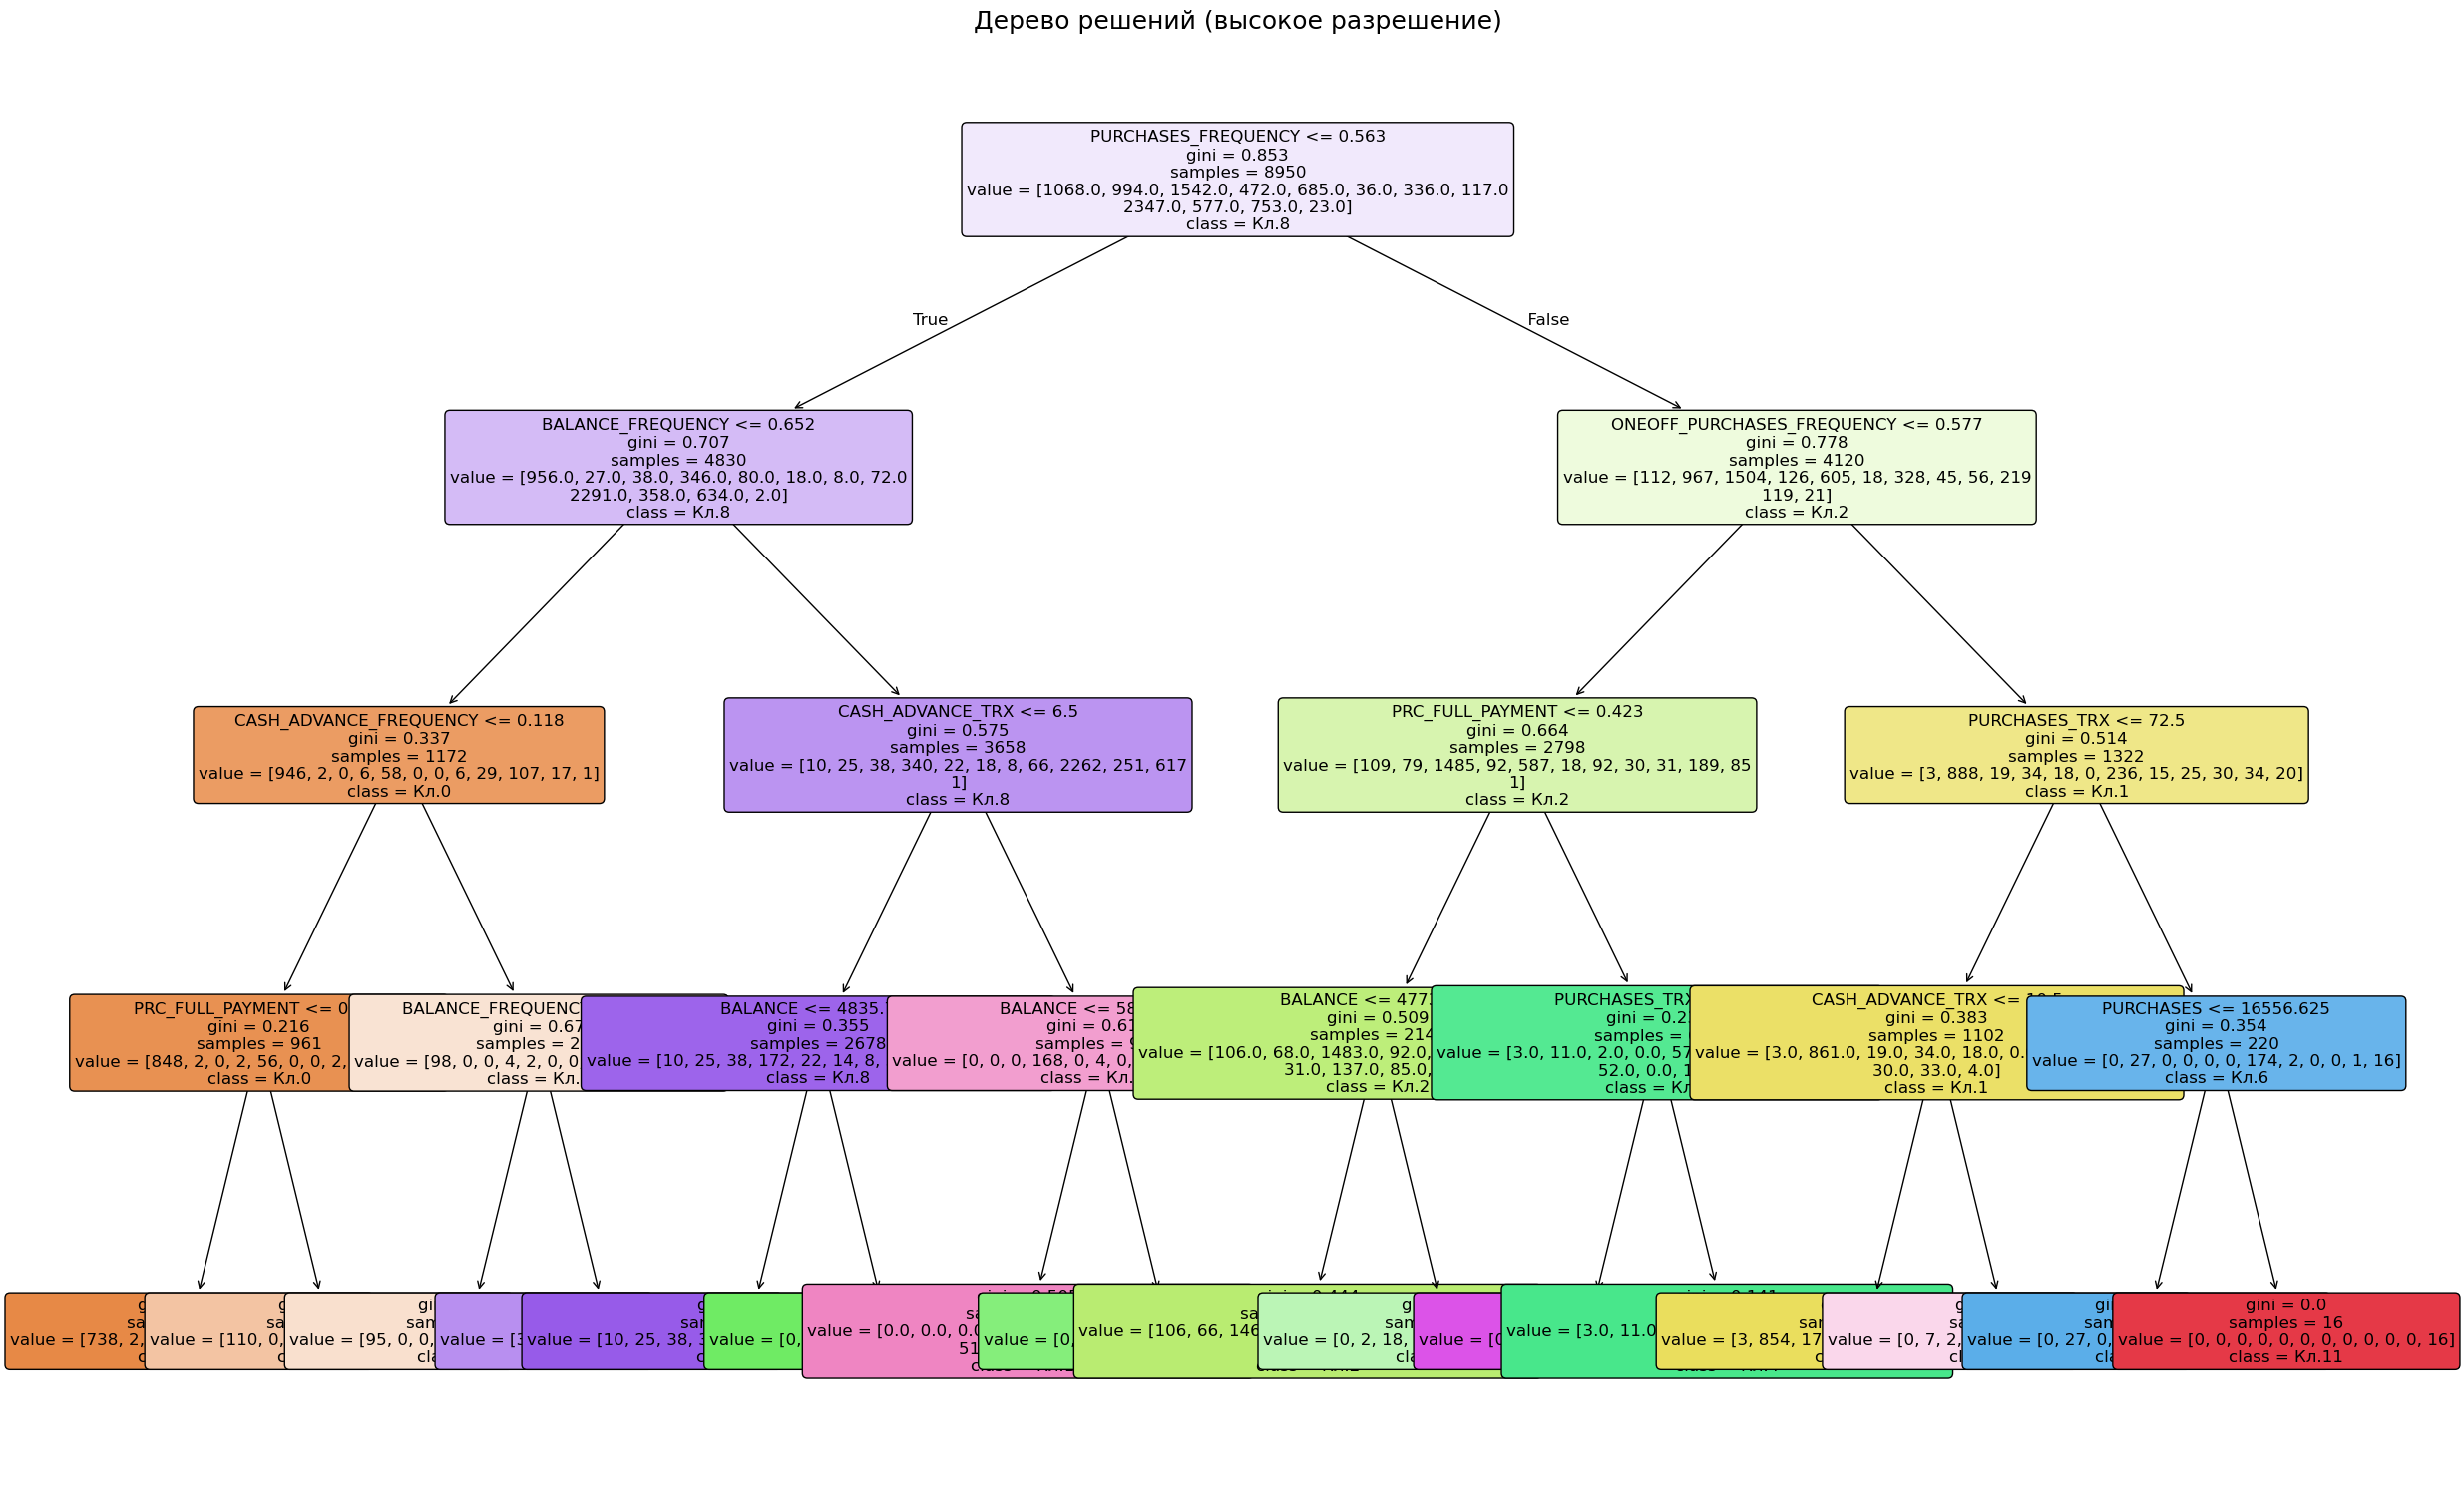

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 
            'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
            'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
            'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 
            'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
df['Cluster'] = kmeans_labels

X = df[features].copy()
cluster = df['Cluster']

tree = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 10, random_state = 42)
tree.fit(X, cluster)

plt.figure(figsize=(25, 15))
plot_tree(tree,
          feature_names=features,
          class_names=[f'Кл.{c}' for c in sorted(cluster.unique())],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Дерево решений (высокое разрешение)", fontsize=18)
plt.tight_layout()
plt.savefig('decision_tree_highres.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,DBSCAN,cluster,DBSCAN_cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,-1,-1,-1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,0,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,-1,-1,-1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,0,0


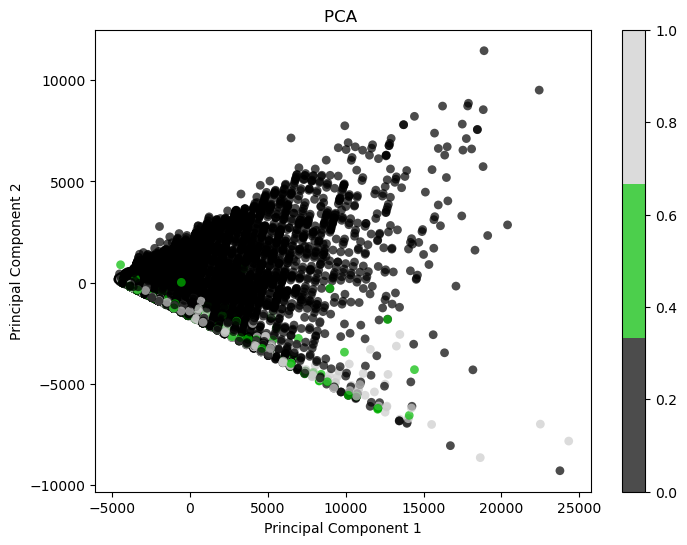

In [30]:
from sklearn.decomposition import PCA

X = df[['BALANCE', 'CREDIT_LIMIT']]

# Инициализация PCA с 2 компонентами
pca = PCA(n_components=2)

# Применение PCA
X_transformed = pca.fit_transform(X)

# Визуализация
plt.figure(figsize=(8,6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1],c = df['PRC_FULL_PAYMENT'], edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 3))
plt.colorbar()
plt.title('PCA ')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

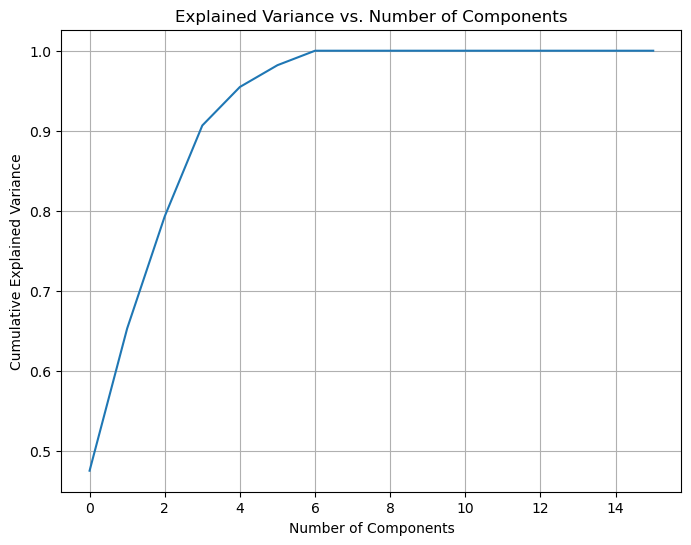

In [32]:
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 
            'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
            'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
            'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 
            'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

X = df[features].fillna(df[features].mean())

pca = PCA()
pca.fit(X)

plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

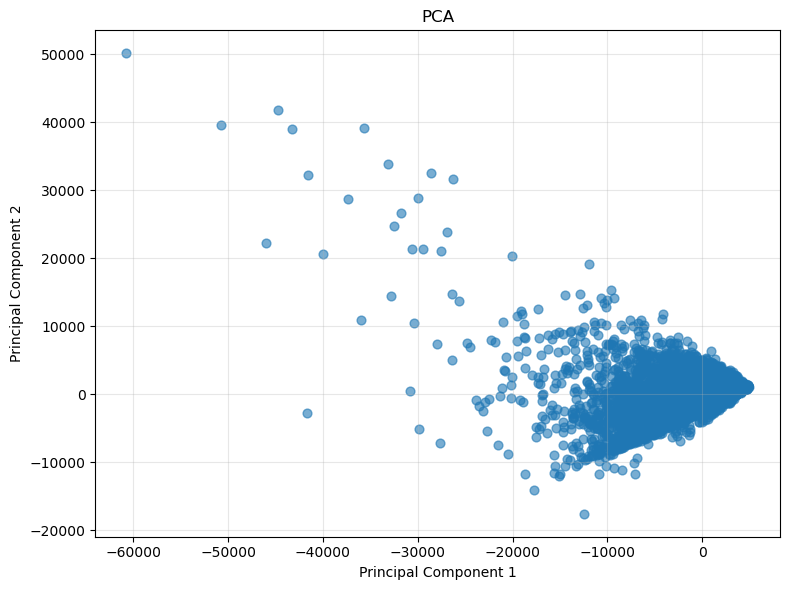

In [24]:

features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 
            'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
            'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
            'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 
            'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
X = df[features].fillna(df[features].mean()).values

X_centered = X - np.mean(X, axis=0) #Центрирование
cov_matrix = np.cov(X_centered, rowvar=False) #Ковариационная матрица
eig_vals, eig_vecs = np.linalg.eig(cov_matrix) #Собственные значения и векторы
X_pca = X_centered @ eig_vecs[:, np.argsort(eig_vals)[::-1][:6]] #Проецирование и сортировка

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=40)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



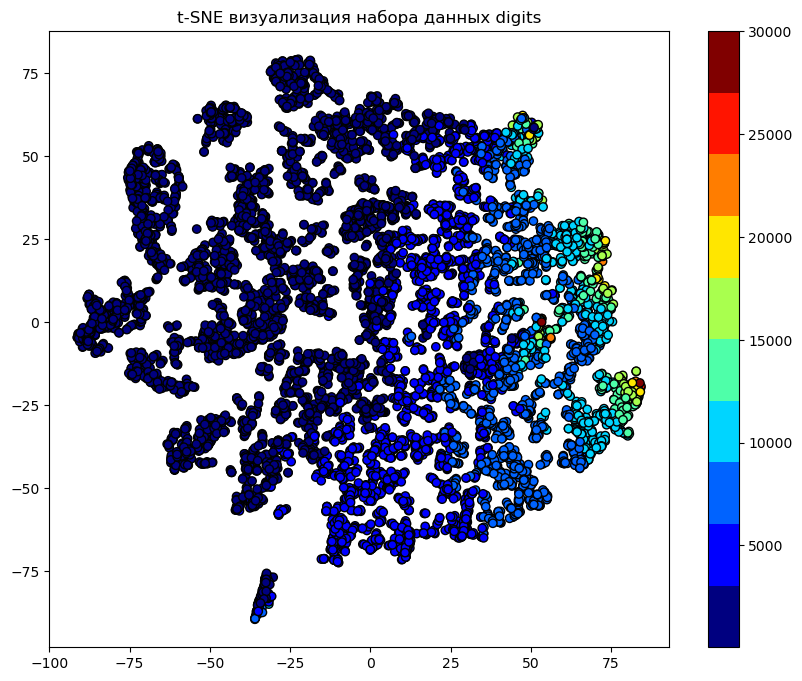

In [38]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolors='k', cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar()
plt.title('t-SNE визуализация набора данных digits')
plt.show()

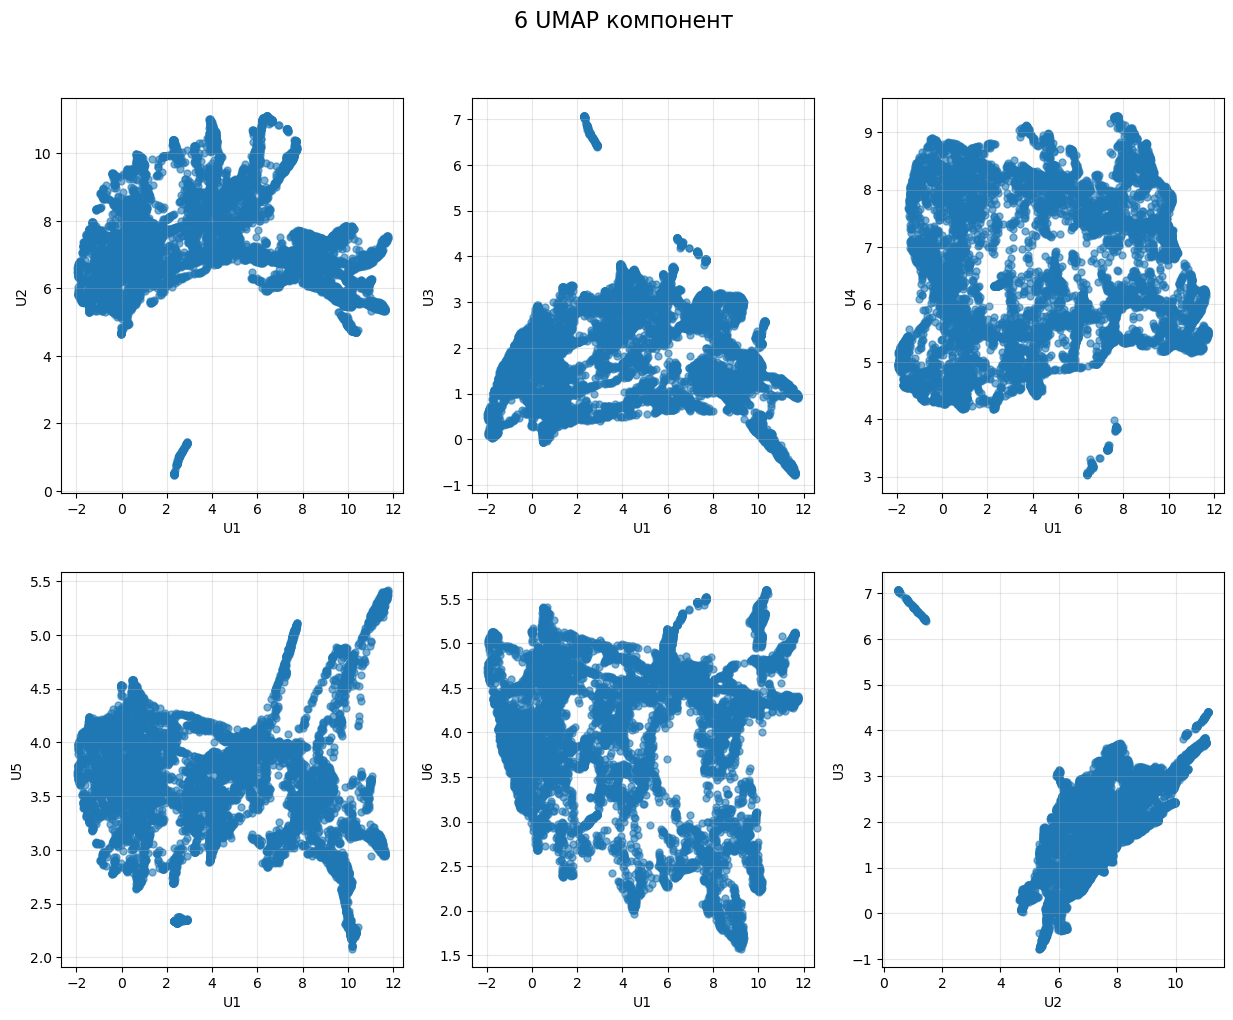

In [34]:
!pip install umap-learn
import umap

X_umap = umap.UMAP(n_components=6, n_neighbors=15, min_dist=0.1).fit_transform(X)

fig, axes = plt.subplots(2, 3, figsize=(15, 11))  # Увеличили высоту

pairs = [(0,1), (0,2), (0,3), (0,4), (0,5), (1,2)]

for idx, (i, j) in enumerate(pairs):
    row, col = divmod(idx, 3)
    axes[row, col].scatter(X_umap[:, i], X_umap[:, j], alpha=0.6, s=25)
    axes[row, col].set_xlabel(f'U{i+1}')
    axes[row, col].set_ylabel(f'U{j+1}')
    axes[row, col].grid(True, alpha=0.3)

plt.subplots_adjust(top=0.9)
plt.suptitle('6 UMAP компонент', fontsize=16)
plt.show()